# <p style="text-align: center;">  Proyecto Módulo 2
### <p style="text-align: center;"> Simulación Montecarlo: Stock Prices  

### <span style="color:blue"> Ana María Aguilera Gómez

### <span style="color:blue"> Efraín Gómez Tapia
    
### <span style="color:blue"> Hector Oñate R.
    
![alt text](https://isngs.com/wp-content/uploads/2016/11/stock-market-trends-what-causes-stock-prices-to-change-768x576.jpg)

In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
style.use('ggplot')

start='2017-01-01'
end='2017-12-31'

In [4]:
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

prices

Date
2017-01-03    116.150002
2017-01-04    116.019997
2017-01-05    116.610001
2017-01-06    117.910004
2017-01-09    118.989998
2017-01-10    119.110001
2017-01-11    119.750000
2017-01-12    119.250000
2017-01-13    119.040001
2017-01-17    120.000000
2017-01-18    119.989998
2017-01-19    119.779999
2017-01-20    120.000000
2017-01-23    120.080002
2017-01-24    119.970001
2017-01-25    121.879997
2017-01-26    121.940002
2017-01-27    121.949997
2017-01-30    121.629997
2017-01-31    121.349998
2017-02-01    128.750000
2017-02-02    128.529999
2017-02-03    129.080002
2017-02-06    130.289993
2017-02-07    131.529999
2017-02-08    132.039993
2017-02-09    132.419998
2017-02-10    132.119995
2017-02-13    133.289993
2017-02-14    135.020004
                 ...    
2017-11-16    171.100006
2017-11-17    170.149994
2017-11-20    169.979996
2017-11-21    173.139999
2017-11-22    174.960007
2017-11-24    174.970001
2017-11-27    174.089996
2017-11-28    173.070007
2017-11-29    169.47

In [5]:
#Porcentaje del cambio (%)
returns = prices.pct_change()
returns

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009159
2017-01-10    0.001009
2017-01-11    0.005373
2017-01-12   -0.004175
2017-01-13   -0.001761
2017-01-17    0.008065
2017-01-18   -0.000083
2017-01-19   -0.001750
2017-01-20    0.001837
2017-01-23    0.000667
2017-01-24   -0.000916
2017-01-25    0.015921
2017-01-26    0.000492
2017-01-27    0.000082
2017-01-30   -0.002624
2017-01-31   -0.002302
2017-02-01    0.060981
2017-02-02   -0.001709
2017-02-03    0.004279
2017-02-06    0.009374
2017-02-07    0.009517
2017-02-08    0.003877
2017-02-09    0.002878
2017-02-10   -0.002266
2017-02-13    0.008856
2017-02-14    0.012979
                ...   
2017-11-16    0.011947
2017-11-17   -0.005552
2017-11-20   -0.000999
2017-11-21    0.018590
2017-11-22    0.010512
2017-11-24    0.000057
2017-11-27   -0.005029
2017-11-28   -0.005859
2017-11-29   -0.020743
2017-11-30    0.013984
2017-12-01   -0.004655
2017-12-04   -0.007308
2017-1

In [15]:
last_price = prices[-1]
last_price

169.22999572753906

In [7]:
#Número de simulaciones
num_simulations = 1000
num_days = 252

In [10]:
simulations_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)

    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1

    simulations_df[x] = price_series

In [20]:
#Estimaciones de precio (random)
simulations_df[x]

0      168.835235
1      170.750994
2      172.535127
3      172.542733
4      173.168547
5      173.864901
6      176.398790
7      177.358288
8      176.790920
9      179.158122
10     178.582113
11     179.117565
12     175.616509
13     177.865015
14     173.607734
15     168.717190
16     166.468004
17     168.666838
18     169.369572
19     170.660366
20     172.648028
21     175.767064
22     171.759473
23     172.684979
24     170.867852
25     170.710838
26     170.993499
27     171.252094
28     170.418280
29     169.946833
          ...    
222    156.805031
223    156.850160
224    154.131059
225    151.949349
226    152.627413
227    152.235079
228    152.991646
229    153.345738
230    155.040493
231    153.530633
232    151.822147
233    150.253855
234    148.533251
235    148.220078
236    148.915733
237    146.313531
238    144.861586
239    147.481669
240    146.900196
241    145.775263
242    143.446743
243    143.252310
244    143.725666
245    142.845487
246    143

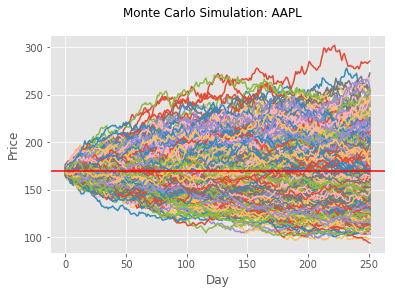

In [12]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulations_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html

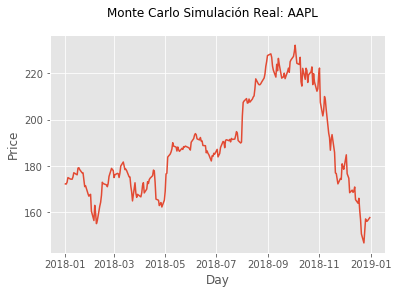

In [8]:
name='AAPL'
startreal='2018-01-01'
endreal='2018-12-31'

pricesreal = web.DataReader(name,'yahoo',startreal,endreal)['Close']

fig = plt.figure()
fig.suptitle('Monte Carlo Simulación Real: AAPL')
plt.plot(pricesreal)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

## Referencias:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html

https://finance.yahoo.com/